In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Loading the Boston Housing Dataset
Regression task with 13 features and a continuous output

In [2]:
data = load_boston()

X = data.data
y = data.target

df_X = pd.DataFrame(X, columns=data.feature_names)
df_y = pd.DataFrame(y, columns=['Price'])

df = pd.concat((df_X, df_y), axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Spliting the data
Splitting the data into train and test

In [3]:
X = df.drop('Price', axis=1).values
y = df['Price'].values

org_train_x, org_test_x, train_y, test_y = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42)

print('train_x:', org_train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', org_test_x.shape)
print('test_y:', test_y.shape)

train_x: (404, 13)
train_y: (404,)
test_x: (102, 13)
test_y: (102,)


### Scaling the data
z = (x - mean) / std

In [4]:
scaler = StandardScaler()
scaler.fit(org_train_x)

with open('z_scaler_boston.save', 'wb') as f:
    pickle.dump(scaler, f)

with open('z_scaler_boston.save', 'rb') as f:
    scaler = pickle.load(f)

scaled_train_x = scaler.transform(org_train_x)
scaled_test_x = scaler.transform(org_test_x)

print('Std of train_x:', org_train_x.std())
print('Std of scaled_train_x:', scaled_train_x.std())
print('Mean of train_x:', org_train_x.mean())
print('Mean of scaled train_x:', scaled_train_x.mean())
print('\nStd of test_x:', org_test_x.std())
print('Std of scaled_test_x:', scaled_test_x.std())
print('Mean of test_x:', org_test_x.mean())
print('Mean of scaled_test_x:', scaled_test_x.mean())

Std of train_x: 144.150741589
Std of scaled_train_x: 1.0
Mean of train_x: 69.6857609958
Mean of scaled train_x: 1.36372253931e-15

Std of test_x: 149.058868102
Std of scaled_test_x: 0.973384504202
Mean of test_x: 71.6115674736
Mean of scaled_test_x: 0.0305379344872


### Principal Component Analysis
Plotting the full variance first, then reducing dimensions.

[ 0.46365886  0.11401877  0.09775484  0.06702416  0.06538962  0.05115833
  0.04108269  0.03042998  0.02084603  0.01702393  0.01379156  0.01293276
  0.00488848]


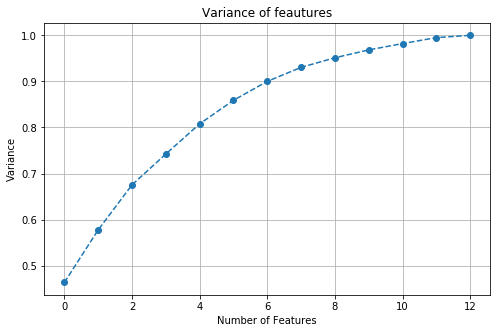

In [5]:
pca = PCA(n_components=13)  # 13 features
pca.fit(scaled_train_x)

print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
plt.title('Variance of feautures')
plt.xlabel('Number of Features')
plt.ylabel('Variance')
plt.grid()

In [6]:
pca = PCA(n_components=6)
pca.fit(scaled_train_x)

with open('pca_boston.save', 'wb') as f:
    pickle.dump(scaler, f)

with open('pca_boston.save', 'rb') as f:
    scaler = pickle.load(f)

train_x = pca.transform(scaled_train_x)
test_x = pca.transform(scaled_test_x)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(404, 6)
(404,)
(102, 6)
(102,)


### Visualizing target distribution

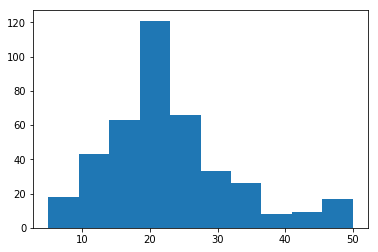

In [7]:
plt.hist(train_y)
plt.show()

In [8]:
train_y = np.log(train_y)
test_y = np.log(test_y)

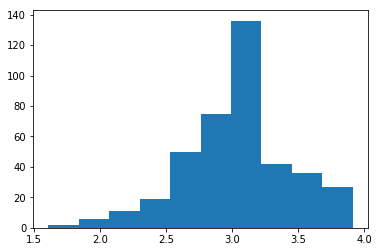

In [9]:
plt.hist(train_y)
plt.show()

### Data preprocessed:
1. Split the data into training and testing datasets.
2. Scaled the data by fitting Standard Scaler (z-score) on train_x, and transforming both train_x and test_x.
3. Principal Component Analysis, fit on train_x and transform both train_x and test_x, reduced dimensions from 13 to 6.

### Linear Regression

In [10]:
model = LinearRegression()
model.fit(train_x, train_y)

pred = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred))
r2 = r2_score(test_y, pred)

print(f'RMSE: {rmse} | R2: {r2}')

RMSE: 0.23589141233753677 | R2: 0.6430370176326422


### K Neighbors Regressor

In [11]:
model = KNeighborsRegressor()
model.fit(train_x, train_y)

pred = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred))
r2 = r2_score(test_y, pred)

print(f'RMSE: {rmse} | R2: {r2}')

RMSE: 0.21392904855978623 | R2: 0.7064119059763383


### Decision Tree

In [12]:
model = DecisionTreeRegressor()
model.fit(train_x, train_y)

pred = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred))
r2 = r2_score(test_y, pred)

print(f'RMSE: {rmse} | R2: {r2}')

RMSE: 0.23582437561616396 | R2: 0.6432398756132329


### Random Forest

In [13]:
model = RandomForestRegressor()
model.fit(train_x, train_y)

pred = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred))
r2 = r2_score(test_y, pred)

print(f'RMSE: {rmse} | R2: {r2}')

RMSE: 0.20442432367031532 | R2: 0.7319202194333135


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Support Vector Regressor

In [14]:
model = SVR()
model.fit(train_x, train_y)

pred = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred))
r2 = r2_score(test_y, pred)

print(f'RMSE: {rmse} | R2: {r2}')

RMSE: 0.18566694155265268 | R2: 0.7788596019085774


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Multi Layer Perceptron

In [15]:
model = MLPRegressor()
model.fit(train_x, train_y)

pred = model.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, pred))
r2 = r2_score(test_y, pred)

print(f'RMSE: {rmse} | R2: {r2}')

RMSE: 0.27594486541910496 | R2: 0.5115236351112468


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
